# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read data

In [2]:
results_path = "./results/linking1/scoring_concat.xlsx"
df = pd.read_excel(results_path)

In [3]:
len(set(df[df["in_nifs"] == 1]["company_name"]))

243

# Minable view

In [4]:
features = ["order", 'in_text', 'in_headers', 'in_links', 'in_emails', 'in_phones', 'in_bvds',
            'in_nifs', 'in_locations', 'domain_similarity_lev','domain_similarity_lev_abs', 
            'domain_similarity_jaro', 'scoring']
x = df[features]

In [5]:
y = df["matching"]

# Exploratory analysis

In [6]:
x.loc[x['scoring'] == float('inf'), 'scoring'] = 1

In [7]:
x[x['scoring']==float('1')]

,order,in_text,in_headers,in_links,in_emails,in_phones,in_bvds,in_nifs,in_locations,domain_similarity_lev,domain_similarity_lev_abs,domain_similarity_jaro,scoring
6844,0,2149,0,0,0.977778,1,1,1,0.6,0.761905,5,0.911111,1.0
6845,4,2163,0,0,0.977778,1,1,1,0.6,0.761905,5,0.911111,1.0
6846,6,2142,0,0,0.977778,1,1,1,0.6,0.761905,5,0.911111,1.0
6854,0,0,0,0,0.880000,1,0,1,0.4,0.571429,6,0.880000,1.0
6855,2,0,0,0,0.880000,1,0,1,0.4,0.571429,6,0.880000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8780,9,172,0,0,1.000000,1,0,1,0.8,1.000000,0,1.000000,1.0
8783,0,2,0,0,0.835870,1,0,1,0.8,0.266667,19,0.457557,1.0
8785,2,89,0,0,0.977778,1,0,1,0.6,0.941176,1,0.977778,1.0
8788,5,110,0,0,0.981818,1,0,1,0.8,0.952381,1,0.981818,1.0


<Axes: >

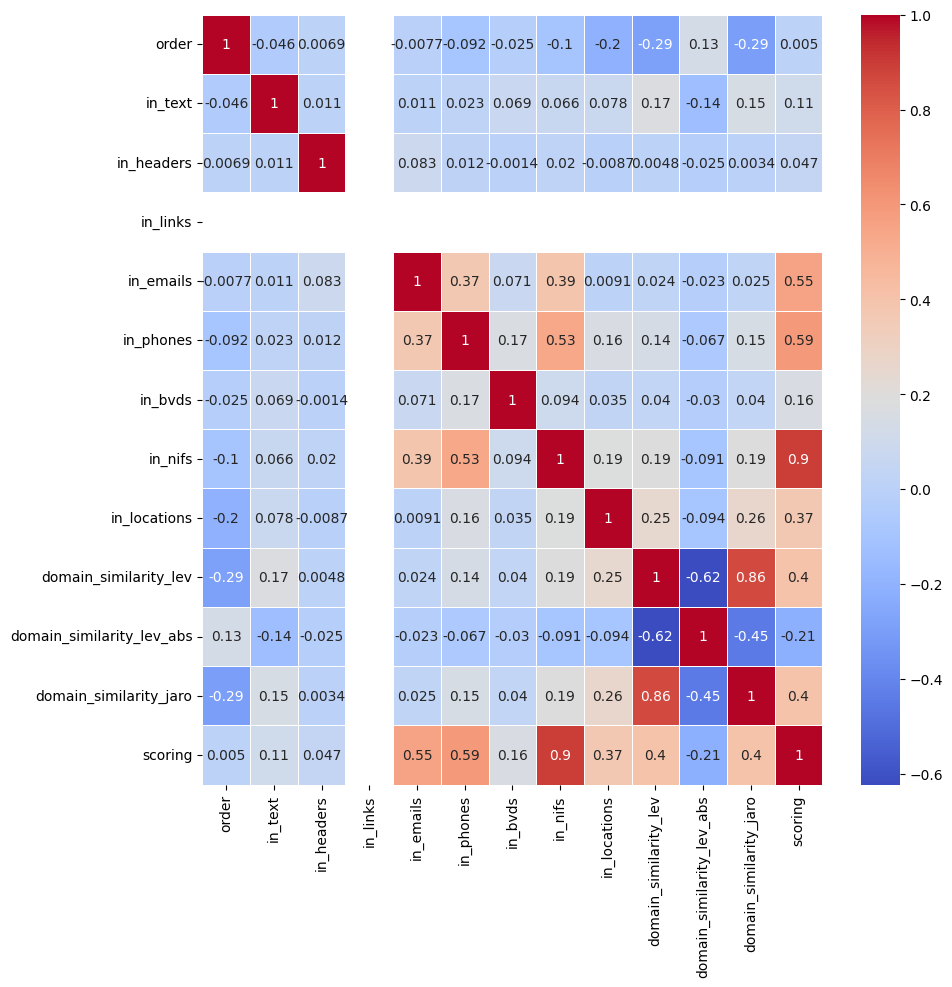

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = x.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5, ax=ax)  

# Evaluation function

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML algorithms

In [10]:
# [Linkedin](https://www.linkedin.com/posts/rosanaferrero_datascience-anaerlisisdedatos-stats-activity-7323949625218875392-xIA8/?utm_source=share&utm_medium=member_android&rcm=ACoAAEi_prIB6DeM8tLfGiqyxpyanvA94fRXUHg)
# [Real python](https://realpython.com/logistic-regression-python/)
# [Data camp](https://www.datacamp.com/tutorial/understanding-logistic-regression-python)
from sklearn.linear_model import LogisticRegression

In [11]:
# https://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

In [12]:
# https://scikit-learn.org/stable/modules/cross_validation.html
from sklearn import svm

In [13]:
# https://scikit-learn.org/stable/modules/tree.html
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [14]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.ExtraTreeClassifier.html#sklearn.tree.ExtraTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier

In [15]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [16]:
# https://scikit-learn.org/stable/modules/ensemble.html
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [17]:
# https://scikit-learn.org/stable/modules/neural_networks_supervised.html
from sklearn.neural_network import MLPClassifier

In [18]:
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-callable
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline  

In [19]:
def evaluate(score_dic):
    for model, model_scores in score_dic.items():
        print(f'\nModel: {model}')
        print(f'{"Metric":<20} {"Mean":<10} {"Std Dev":<10}')
        print('-' * 40)
        for k, v in model_scores.items():
            print(f'{k:<20} {v.mean():<10.2f} {v.std():<10.2f}')

In [20]:
def build_score_dataframe(scores_dic):
    import pandas as pd
    import matplotlib.pyplot as plt
    
    summary = {}
    
    for model_name, model_scores in scores_dic.items():
        summary[model_name] = {}
        for metric, values in model_scores.items():
            summary[model_name][f'{metric}_mean'] = values.mean()
            summary[model_name][f'{metric}_min'] = values.min()
            summary[model_name][f'{metric}_max'] = values.max()
            summary[model_name][f'{metric}_std'] = values.std()
    
    df = pd.DataFrame(summary).T
    return df
    
# To filter only the mean values for plotting
metrics_to_plot = [
    'test_r2', 'test_roc_auc', 'test_accuracy',
    'test_f1', 'test_precision', 'test_recall',
    'test_matthews_corrcoef'
]
# df_filtered = df[[f"{metric}_mean" for metric in metrics_to_plot]]


In [21]:
def plot_kpis_by_model(df: pd.DataFrame, stat: str = 'mean'):
    """
    Plot specified statistic of KPIs by model.

    Parameters:
    - df: DataFrame with metrics in the format 'metric_stat' (e.g., 'test_r2_mean')
    - stat: One of 'mean', 'min', 'max', 'std'
    """
    import pandas as pd
    import matplotlib.pyplot as plt
    valid_stats = {'mean', 'min', 'max', 'std'}
    if stat not in valid_stats:
        raise ValueError(f"Invalid stat '{stat}'. Must be one of {valid_stats}.")

    metrics = [
        'test_r2', 'test_roc_auc', 'test_accuracy',
        'test_f1', 'test_precision', 'test_recall',
        'test_matthews_corrcoef'
    ]

    # Construct the column names based on the requested stat
    stat_columns = [f"{metric}_{stat}" for metric in metrics]

    # Filter the DataFrame
    df_filtered = df[stat_columns]
    df_filtered.columns = metrics  # Clean up column names for the plot

    # Plot
    ax = df_filtered.T.plot(kind='bar', figsize=(14, 6), rot=45)
    ax.set_title(f"KPIs by model ({stat})")
    ax.set_ylabel(f"{stat.capitalize()} value")
    ax.set_xlabel("KPI")
    plt.grid()
    plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


## Basic models without SMOTE

In [43]:
logreg = LogisticRegression(random_state=0)
bnb = BernoulliNB()
mnb = MultinomialNB()
extra_tree = ExtraTreeClassifier(random_state=0)
dt = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(max_depth=2, random_state=0)
et = BaggingClassifier(extra_tree, random_state=0)
sv = svm.SVC(random_state=0)
gb = GradientBoostingClassifier(random_state=0)
mlp = MLPClassifier(random_state=0)


scoring = ['r2', 'roc_auc', 'accuracy', 'f1', 'precision', 'recall', 'matthews_corrcoef']
scores = {}
models = {"logistic_regression": logreg,
         "naive_bayes_bernoulli": bnb,
         "naive_bayes_multinomial": mnb,
         "support_vector_machines":sv,
         "decision_trees":dt,
         "random_forest":rf,
         "extra_trees":et,
         "gradient_boosted_trees":gb,
         "multilayer_perceptron":mlp}

x_logreg = x.drop(["domain_similarity_jaro", "domain_similarity_lev_abs", "in_nifs"], axis=1)
x_bnb = x[["in_phones", "in_nifs", "in_bvds"]]
x_mbn = x.drop(["domain_similarity_lev", "domain_similarity_jaro", "domain_similarity_lev_abs", "scoring"], axis=1)


features_dict = {
    "logistic_regression": x_logreg,
    "naive_bayes_bernoulli": x_bnb,
    "naive_bayes_multinomial": x_mbn,
}

# results
scores = {}

models_with_smote = ["gradient_boosted_trees"]

for model_name, model in models.items():
    print(f"Training model: {model_name}")

    # input data
    X_input = features_dict.get(model_name, x)  
    
    steps = []

    # conditional processing
    if model_name in ["logistic_regression", "support_vector_machines"]: # , "decision_trees", "random_forest", "extra_trees", "gradient_boosted_trees"
        steps.append(('scaler', StandardScaler()))
    elif model_name == "multilayer_perceptron":
        steps.append(('scaler', MinMaxScaler()))
    
    # SMOTE step
    if model_name in models_with_smote:
        steps.append(('smote', SMOTE(random_state=0)))

    # model
    steps.append(('model', model))

    # pipeline
    pipeline = Pipeline(steps)

    # cross validation
    model_scores = cross_validate(pipeline, X_input, y, scoring=scoring, cv=10, n_jobs=-1)
    scores[model_name] = model_scores

Training model: logistic_regression
Training model: naive_bayes_bernoulli


/home/aitana/myenv/mi_entorno/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/aitana/myenv/mi_entorno/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/aitana/myenv/mi_entorno/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/aitana/mye

Training model: naive_bayes_multinomial
Training model: support_vector_machines
Training model: decision_trees
Training model: random_forest
Training model: extra_trees
Training model: gradient_boosted_trees
Training model: multilayer_perceptron


/home/aitana/myenv/mi_entorno/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/aitana/myenv/mi_entorno/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/aitana/myenv/mi_entorno/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/aitana/myenv/mi_entorno/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ai

In [46]:
evaluate(scores)


Model: logistic_regression
Metric               Mean       Std Dev   
----------------------------------------
fit_time             0.01       0.00      
score_time           0.01       0.00      
test_r2              0.40       0.16      
test_roc_auc         0.94       0.02      
test_accuracy        0.89       0.03      
test_f1              0.75       0.07      
test_precision       0.82       0.06      
test_recall          0.70       0.08      
test_matthews_corrcoef 0.69       0.09      

Model: naive_bayes_bernoulli
Metric               Mean       Std Dev   
----------------------------------------
fit_time             0.00       0.00      
score_time           0.01       0.00      
test_r2              -0.19      0.21      
test_roc_auc         0.57       0.13      
test_accuracy        0.79       0.04      
test_f1              0.16       0.28      
test_precision       0.21       0.33      
test_recall          0.16       0.28      
test_matthews_corrcoef 0.15       0.25   

In [51]:
df_basic_no_smote = build_score_dataframe(scores)

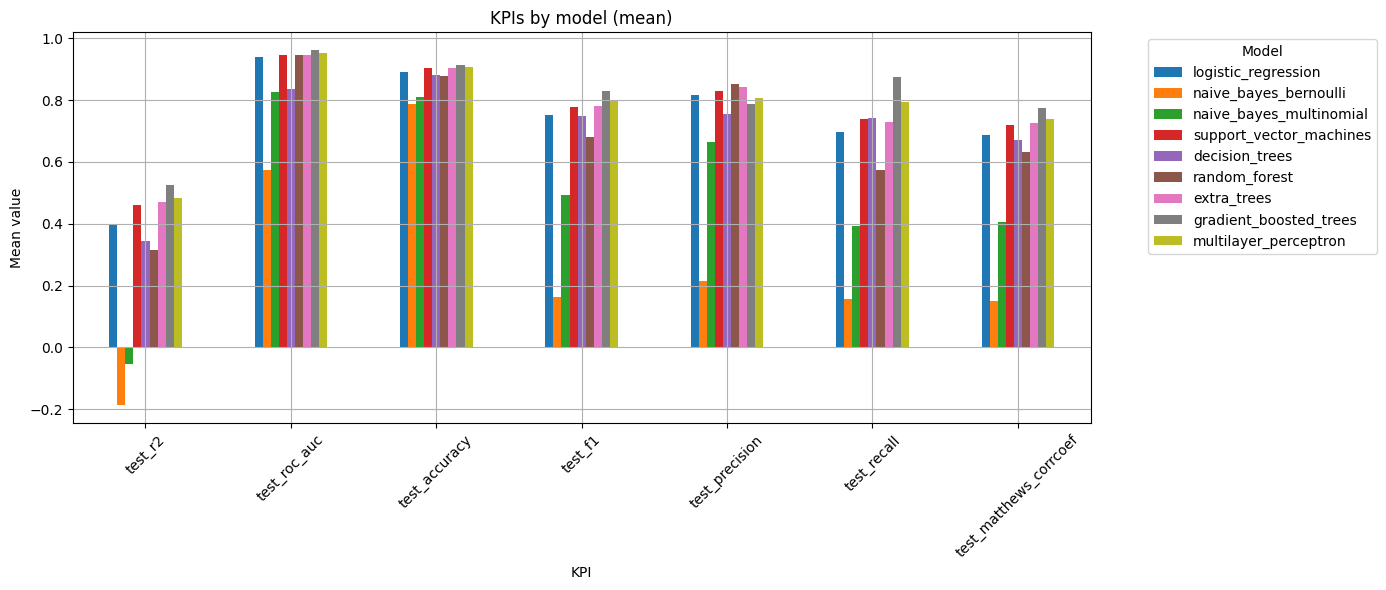

In [52]:
plot_kpis_by_model(df_basic_no_smote)

## Basic models with SMOTE

In [53]:
logreg = LogisticRegression(random_state=0)
bnb = BernoulliNB()
mnb = MultinomialNB()
extra_tree = ExtraTreeClassifier(random_state=0)
dt = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(max_depth=2, random_state=0)
et = BaggingClassifier(extra_tree, random_state=0)
sv = svm.SVC(random_state=0)
gb = GradientBoostingClassifier(random_state=0)
mlp = MLPClassifier(random_state=0)


scoring = ['r2', 'roc_auc', 'accuracy', 'f1', 'precision','recall', 'matthews_corrcoef'] # , 'f1_weighted', 'f1_macro'
scores = {}
models = {"logistic_regression": logreg,
         "naive_bayes_bernoulli": bnb,
         "naive_bayes_multinomial": mnb,
         "support_vector_machines":sv,
         "decision_trees":dt,
         "random_forest":rf,
         "extra_trees":et,
         "gradient_boosted_trees":gb,
         "multilayer_perceptron":mlp}

x_logreg = x.drop(["domain_similarity_jaro", "domain_similarity_lev_abs", "in_nifs"], axis=1)
x_bnb = x[["in_phones", "in_nifs", "in_bvds"]]
x_mbn = x.drop(["domain_similarity_lev", "domain_similarity_jaro", "domain_similarity_lev_abs", "scoring"], axis=1)
scaler = preprocessing.StandardScaler().fit(x)
x_scaled = scaler.transform(x)
min_max_scaler = preprocessing.MinMaxScaler()
x_min_max = min_max_scaler.fit_transform(x)

features_dict = {
    "logistic_regression": x_logreg,
    "naive_bayes_bernoulli": x_bnb,
    "naive_bayes_multinomial": x_mbn,
}

# results
scores = {}

for model_name, model in models.items():
    print(f"Training model: {model_name}")

    # input data
    X_input = features_dict.get(model_name, x)  
    
    steps = []

    # conditional processing
    if model_name in ["logistic_regression", "support_vector_machines"]:
        steps.append(('scaler', StandardScaler()))
    elif model_name == "multilayer_perceptron":
        steps.append(('scaler', MinMaxScaler()))
    
    # SMOTE step
    steps.append(('smote', SMOTE(random_state=42)))

    # model
    steps.append(('model', model))

    # pipeline
    pipeline = Pipeline(steps)

    # cross validation
    model_scores = cross_validate(pipeline, X_input, y, scoring=scoring, cv=10, n_jobs=-1)
    scores[model_name] = model_scores

Training model: logistic_regression
Training model: naive_bayes_bernoulli
Training model: naive_bayes_multinomial
Training model: support_vector_machines


/home/aitana/myenv/mi_entorno/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/aitana/myenv/mi_entorno/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/aitana/myenv/mi_entorno/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/aitana/mye

Training model: decision_trees
Training model: random_forest
Training model: extra_trees
Training model: gradient_boosted_trees
Training model: multilayer_perceptron


/home/aitana/myenv/mi_entorno/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/aitana/myenv/mi_entorno/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/aitana/myenv/mi_entorno/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/aitana/myenv/mi_entorno/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ai

In [54]:
evaluate(scores)


Model: logistic_regression
Metric               Mean       Std Dev   
----------------------------------------
fit_time             0.03       0.00      
score_time           0.01       0.00      
test_r2              0.32       0.13      
test_roc_auc         0.94       0.02      
test_accuracy        0.88       0.02      
test_f1              0.77       0.04      
test_precision       0.70       0.05      
test_recall          0.86       0.04      
test_matthews_corrcoef 0.70       0.06      

Model: naive_bayes_bernoulli
Metric               Mean       Std Dev   
----------------------------------------
fit_time             0.02       0.00      
score_time           0.01       0.00      
test_r2              -0.19      0.21      
test_roc_auc         0.57       0.13      
test_accuracy        0.79       0.04      
test_f1              0.16       0.28      
test_precision       0.21       0.33      
test_recall          0.16       0.28      
test_matthews_corrcoef 0.15       0.25   

In [55]:
df_basic_with_smote = build_score_dataframe(scores)

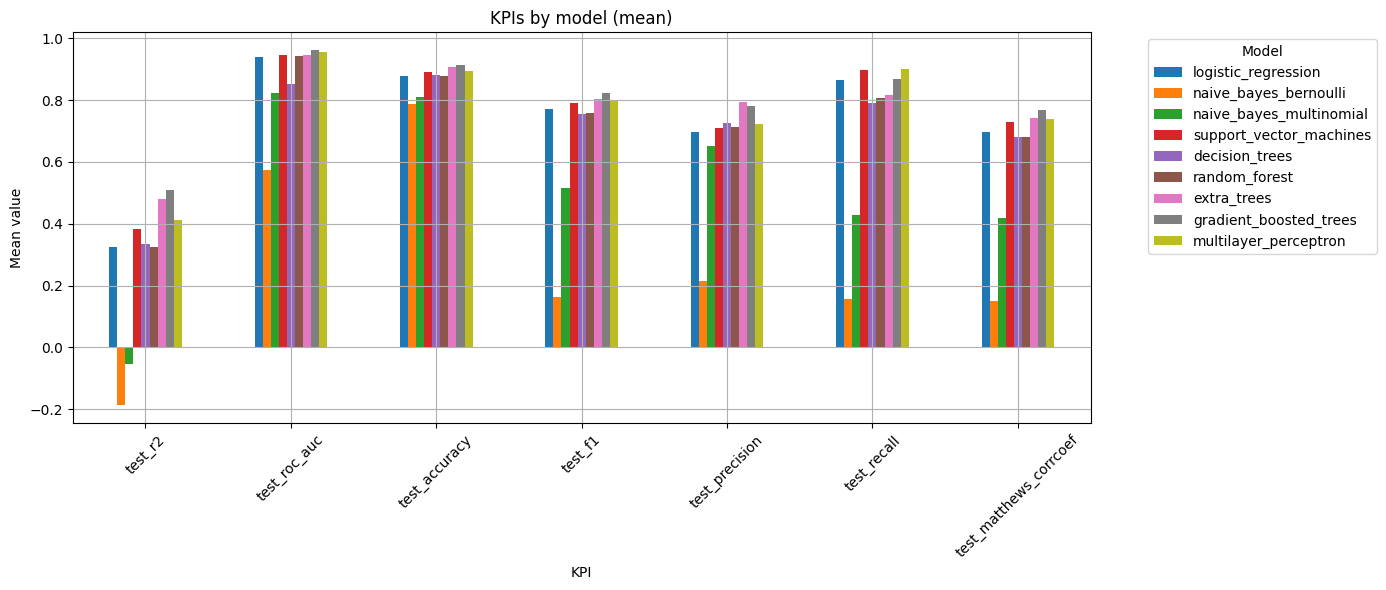

In [56]:
plot_kpis_by_model(df_basic_with_smote)

In [57]:
df_basic_no_smote.to_csv("base_models_no_smote.csv")
df_basic_with_smote.to_csv("base_models_with_smote.csv")

In [32]:
import pickle

with open('models_smote.pickle', 'wb') as handle:
    pickle.dump({"models":models, "scores":scores}, handle, protocol=pickle.HIGHEST_PROTOCOL)


# Randomized search

In [69]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import numpy as np


In [37]:
# Logistic regression
pipe_lr = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(solver='liblinear', random_state=0))
])

param_dist_lr = {
    'clf__C': np.logspace(-4, 4, 20),
    'clf__penalty': ['l1', 'l2']
}

search_lr = RandomizedSearchCV(
    pipe_lr, param_distributions=param_dist_lr,
    n_iter=20, scoring='f1_macro', cv=5, random_state=42, n_jobs=-1
)


In [97]:
pipe_et = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', ExtraTreesClassifier(random_state=0))
])
param_dist_et = {
    "clf__n_estimators": range(10, 201, 30),
    "clf__criterion": ["gini", "entropy", "log_loss"],
    "clf__max_depth": range(5, 61, 10),
    "clf__min_samples_split": range(2, 21, 5),
    "clf__min_samples_leaf": range(1, 21, 5),
    "clf__max_features": ["sqrt", "log2", None],
    "clf__bootstrap": [True, False]
}

search_et = RandomizedSearchCV(
    pipe_et,
    param_distributions=param_dist_et,
    n_iter=20,
    scoring='f1',
    cv=5,
    random_state=0,
    n_jobs=-1
)

In [98]:
# Gradient boosted trees
pipe_gb = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', GradientBoostingClassifier(random_state=0))
])

param_dist_gb = {
    "clf__loss": ["log_loss", "exponential"],
    "clf__learning_rate": [0.01, 0.05, 0.1, 0.2],
    "clf__n_estimators": [20, 40, 60],
    "clf__min_samples_split": [2, 20, 40, 60],
    "clf__min_samples_leaf": [1, 20, 40, 60],
    "clf__max_depth": [1, 20, 40, 60],
    "clf__min_impurity_decrease": [0.0, 0.1, 0.2, 0.3],
    "clf__subsample": [0.6, 0.8, 1.0]
}


search_gb = RandomizedSearchCV(
    pipe_gb, param_distributions=param_dist_gb,
    n_iter=20, scoring='f1', cv=5, random_state=0, n_jobs=-1
)


In [99]:
# Multilayer perceptron
pipe_mlp = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', MinMaxScaler()),
    ('clf', MLPClassifier(max_iter=500, random_state=0))
])

param_dist_mlp = {
    'clf__hidden_layer_sizes': [
        (10,), (50,), (100,), (50, 10), (100, 50), (100, 50, 10)],
    'clf__activation': ['tanh', 'relu', 'logistic'],
    'clf__solver': ['adam', 'sgd'], # , 'lbfgs'
    'clf__alpha': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2],
    'clf__learning_rate': ['constant', 'invscaling', 'adaptive'],
    'clf__learning_rate_init': [1e-4, 1e-3, 1e-2],
    'clf__early_stopping': [True, False]
}

search_mlp = RandomizedSearchCV(
    pipe_mlp, param_distributions=param_dist_mlp,
    n_iter=20, scoring='f1', cv=5, random_state=0, n_jobs=-1
)

In [100]:
# search_lr.fit(x, y)
search_et.fit(x, y)
search_gb.fit(x, y)
search_mlp.fit(x, y)

/home/aitana/myenv/mi_entorno/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                             ('scaler', MinMaxScaler()),
                                             ('clf',
                                              MLPClassifier(max_iter=500,
                                                            random_state=0))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'clf__activation': ['tanh', 'relu',
                                                            'logistic'],
                                        'clf__alpha': [1e-06, 1e-05, 0.0001,
                                                       0.001, 0.01],
                                        'clf__early_stopping': [True, False],
                                        'clf__hidden_layer_sizes': [(10,),
                                                                    (50,),
                                                                    (100,),
                                                                    (50, 10),
                                                                    (100, 50),
                                                                    (100, 50,
                                                                     10)],
                                        'clf__learning_rate': ['constant',
                                                               'invscaling',
                                                               'adaptive'],
                                        'clf__learning_rate_init': [0.0001,
                                                                    0.001,
                                                                    0.01],
                                        'clf__solver': ['adam', 'sgd']},
                   random_state=0, scoring='f1')

In [102]:
#print("Logistic Regression:", search_lr.best_params_, search_lr.best_score_)
print("Extra trees:", search_et.best_params_, search_et.best_score_)
print()
print("Gradient Boosting:", search_gb.best_params_, search_gb.best_score_)
print()
print("MLP:", search_mlp.best_params_, search_mlp.best_score_)


Extra trees: {'clf__n_estimators': 100, 'clf__min_samples_split': 17, 'clf__min_samples_leaf': 1, 'clf__max_features': 'sqrt', 'clf__max_depth': 25, 'clf__criterion': 'gini', 'clf__bootstrap': False} 0.8208058196988051

Gradient Boosting: {'clf__subsample': 0.8, 'clf__n_estimators': 60, 'clf__min_samples_split': 40, 'clf__min_samples_leaf': 40, 'clf__min_impurity_decrease': 0.2, 'clf__max_depth': 20, 'clf__loss': 'exponential', 'clf__learning_rate': 0.2} 0.8273640435626328

MLP: {'clf__solver': 'adam', 'clf__learning_rate_init': 0.01, 'clf__learning_rate': 'invscaling', 'clf__hidden_layer_sizes': (100, 50, 10), 'clf__early_stopping': True, 'clf__alpha': 0.001, 'clf__activation': 'relu'} 0.7999191902788458


In [106]:
results_gb = pd.DataFrame(search_gb.cv_results_)
results_gb = results_gb.sort_values(by=["rank_test_score"])
results_gb

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__subsample,param_clf__n_estimators,param_clf__min_samples_split,param_clf__min_samples_leaf,param_clf__min_impurity_decrease,param_clf__max_depth,...,param_clf__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,2.300392,0.077912,0.006814,0.000283,0.8,60,40,40,0.2,20,...,0.20,"{'clf__subsample': 0.8, 'clf__n_estimators': 6...",0.767773,0.824356,0.850123,0.827503,0.867066,0.827364,0.033629,1
6,0.961149,0.075821,0.005174,0.000274,0.8,40,60,40,0.3,20,...,0.20,"{'clf__subsample': 0.8, 'clf__n_estimators': 4...",0.775604,0.829493,0.848851,0.821724,0.846512,0.824437,0.026461,2
1,2.297385,0.139498,0.006422,0.000217,1.0,60,60,60,0.2,40,...,0.10,"{'clf__subsample': 1.0, 'clf__n_estimators': 6...",0.778555,0.821101,0.852657,0.827014,0.837647,0.823395,0.024853,3
2,5.379779,0.210518,0.010262,0.000599,1.0,60,20,20,0.0,20,...,0.10,"{'clf__subsample': 1.0, 'clf__n_estimators': 6...",0.777778,0.820633,0.839901,0.819162,0.853774,0.822250,0.025672,4
10,1.731561,0.089031,0.005910,0.000191,0.8,60,60,40,0.1,20,...,0.20,"{'clf__subsample': 0.8, 'clf__n_estimators': 6...",0.782509,0.817654,0.847087,0.814727,0.848989,0.822193,0.024450,5
7,0.987141,0.094177,0.005160,0.000473,0.8,40,40,1,0.3,40,...,0.20,"{'clf__subsample': 0.8, 'clf__n_estimators': 4...",0.766900,0.824214,0.833536,0.819249,0.861575,0.821095,0.030802,6
15,1.758654,0.106076,0.008100,0.003203,0.6,60,40,1,0.3,40,...,0.05,"{'clf__subsample': 0.6, 'clf__n_estimators': 6...",0.769406,0.823799,0.850962,0.819558,0.840336,0.820812,0.028083,7
12,1.415098,0.100327,0.006353,0.000639,0.8,40,60,40,0.3,20,...,0.10,"{'clf__subsample': 0.8, 'clf__n_estimators': 4...",0.769585,0.817869,0.851986,0.817861,0.842956,0.820052,0.028638,8
14,1.008335,0.045555,0.005903,0.000535,0.8,20,2,40,0.1,20,...,0.20,"{'clf__subsample': 0.8, 'clf__n_estimators': 2...",0.776897,0.816837,0.848193,0.813239,0.832749,0.817583,0.023840,9
8,0.797323,0.031709,0.005215,0.000467,0.8,20,60,60,0.1,60,...,0.20,"{'clf__subsample': 0.8, 'clf__n_estimators': 2...",0.768879,0.815490,0.849282,0.808962,0.837054,0.815933,0.027645,10


In [ ]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_stats.html#sphx-glr-auto-examples-model-selection-plot-grid-search-stats-py

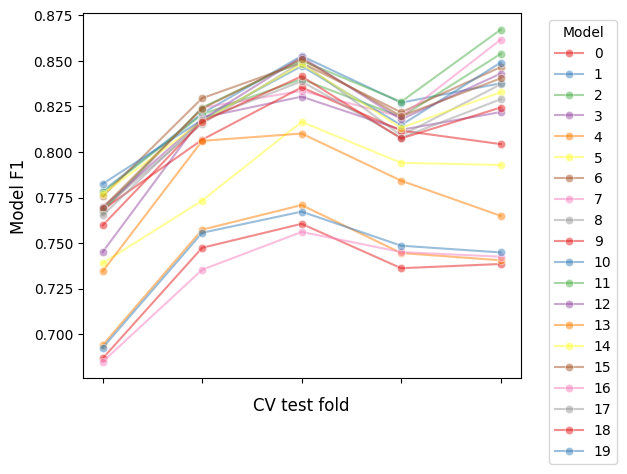

Correlation of models:
           11        6         1         2         10        7         15  \
11  1.000000  0.972411  0.935968  0.997988  0.974904  0.986705  0.956282   
6   0.972411  1.000000  0.972351  0.971207  0.968986  0.948324  0.994714   
1   0.935968  0.972351  1.000000  0.925498  0.945672  0.877124  0.989803   
2   0.997988  0.971207  0.925498  1.000000  0.981206  0.988072  0.952318   
10  0.974904  0.968986  0.945672  0.981206  1.000000  0.941386  0.964009   
7   0.986705  0.948324  0.877124  0.988072  0.941386  1.000000  0.916306   
15  0.956282  0.994714  0.989803  0.952318  0.964009  0.916306  1.000000   
12  0.965610  0.988274  0.989353  0.963094  0.981917  0.919781  0.994835   
14  0.929248  0.975514  0.986398  0.928859  0.967194  0.873037  0.989904   
8   0.947002  0.982875  0.978838  0.949513  0.981654  0.899933  0.990313   
17  0.946647  0.995109  0.978160  0.945868  0.958323  0.912961  0.997211   
18  0.922421  0.985003  0.982691  0.918948  0.938577  0.879649  

In [105]:
# create df of model scores ordered by performance
results_df = results_gb
model_scores = results_df.filter(regex=r"split\d*_test_score")

# plot 30 examples of dependency between cv fold and AUC scores
fig, ax = plt.subplots()
sns.lineplot(
    data=model_scores.transpose().iloc[:30],
    dashes=False,
    palette="Set1",
    marker="o",
    alpha=0.5,
    ax=ax,
)
ax.set_xlabel("CV test fold", size=12, labelpad=10)
ax.set_ylabel("Model F1", size=12)
ax.tick_params(bottom=True, labelbottom=False)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# print correlation of AUC scores across folds
print(f"Correlation of models:\n {model_scores.transpose().corr()}")

# Grid search

In [60]:
# https://scikit-learn.org/stable/modules/grid_search.html
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_stats.html#sphx-glr-auto-examples-model-selection-plot-grid-search-stats-py

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer, f1_score, matthews_corrcoef
from sklearn.model_selection import GridSearchCV

# Scoring with F1 y MCC
scoring = {
    "F1": "f1",
    "MCC": make_scorer(matthews_corrcoef)
}

pipe_mlp = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('clf', MLPClassifier(max_iter=500, random_state=0))
])

param_grid = {
    "loss": ["log_loss", "exponential"],
    "learning_rate": range(0, 61, 20),
    "n_estimators": range(1, 61, 20),
    "criterion": ["friedman_mse", "squared_error"],
    "min_samples_split": range(2, 61, 20),
    "min_samples_leaf": range(1, 61, 20),
    "max_depth": range(1, 61, 20),
    "min_impurity_decrease": range(0, 51, 10)
}

# Grid Search
gs = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    scoring=scoring,
    refit="F1",  
    n_jobs=-1,
    return_train_score=True,
)

# Entrenar
gs.fit(x, y)

# Resultados
results = gs.cv_results_

# Nested CV

## Parameters

In [ ]:
param_dist_bnb = {
    'clf__alpha': np.logspace(-3, 1, 10),
    'clf__fit_prior': [True, False]
}

In [ ]:
param_dist_mnb = {
    'clf__alpha': np.logspace(-3, 1, 10),
    'clf__fit_prior': [True, False]
}


In [ ]:
param_dist_dt = {
    "clf__criterion": ["gini", "entropy", "log_loss"],
    "clf__max_depth": range(3, 21),
    "clf__min_samples_split": range(2, 11),
    "clf__min_samples_leaf": range(1, 11)
}


In [ ]:
param_dist_rf = {
    "clf__n_estimators": [50, 100, 150],
    "clf__max_depth": range(2, 21, 5),
    "clf__criterion": ["gini", "entropy"],
    "clf__bootstrap": [True, False]
}


In [ ]:
param_dist_et_bagging = {
    "clf__n_estimators": [10, 50, 100],
    "clf__max_samples": [0.5, 0.7, 1.0],
    "clf__max_features": [0.5, 0.7, 1.0],
    "clf__bootstrap": [True, False]
}


In [ ]:
param_dist_svm = {
    'clf__C': np.logspace(-3, 3, 10),
    'clf__kernel': ['linear', 'rbf', 'poly'],
    'clf__gamma': ['scale', 'auto']
}


## Nested CV

https://www.kaggle.com/code/jacoporepossi/tutorial-cross-validation-nested-cv

In [34]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import f1_score
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Special datasets
x_logreg = x.drop(["domain_similarity_jaro", "domain_similarity_lev_abs", "in_nifs"], axis=1)
x_bnb = x[["in_phones", "in_nifs", "in_bvds"]]
x_mbn = x.drop(["domain_similarity_lev", "domain_similarity_jaro", "domain_similarity_lev_abs", "scoring"], axis=1)

# Datasets por modelo
features_dict = {
    "logistic_regression": x_logreg,
    "naive_bayes_bernoulli": x_bnb,
    "naive_bayes_multinomial": x_mbn,
    "support_vector_machines": x,
    "decision_trees": x,
    "random_forest": x,
    "extra_trees": x,
    "gradient_boosted_trees": x,
    "multilayer_perceptron": x
}

# Configuración por modelo
model_configs = {
    "logistic_regression": {
        "model": LogisticRegression(solver='liblinear', random_state=0),
        "params": {
            'clf__C': np.logspace(-4, 4, 10),
            'clf__penalty': ['l1', 'l2']
        },
        "scaler": StandardScaler()
    },
    "naive_bayes_bernoulli": {
        "model": BernoulliNB(),
        "params": {
            'clf__alpha': np.logspace(-3, 1, 5),
            'clf__fit_prior': [True, False]
        }
    },
    "naive_bayes_multinomial": {
        "model": MultinomialNB(),
        "params": {
            'clf__alpha': np.logspace(-3, 1, 5),
            'clf__fit_prior': [True, False]
        }
    },
    "support_vector_machines": {
        "model": svm.SVC(random_state=0),
        "params": {
            'clf__C': np.logspace(-3, 3, 5),
            'clf__kernel': ['linear', 'rbf'],
            'clf__gamma': ['scale', 'auto']
        },
        "scaler": StandardScaler()
    },
    "decision_trees": {
        "model": DecisionTreeClassifier(random_state=0),
        "params": {
            "clf__criterion": ["gini", "entropy"],
            "clf__max_depth": [5, 10, 15],
            "clf__min_samples_split": [2, 5, 10]
        }
    },
    "random_forest": {
        "model": RandomForestClassifier(n_jobs=-1, random_state=0),
        "params": {
            'clf__min_samples_split': [60, 120, 180],
            'clf__max_depth': [5, 10, 15],
            'clf__max_features': ['sqrt', 'log2']
        }
    },
    "extra_trees": {
        "model": BaggingClassifier(ExtraTreeClassifier(random_state=0), random_state=0),
        "params": {
            "clf__n_estimators": [10, 50, 100],
            "clf__max_samples": [0.5, 0.8, 1.0],
            "clf__bootstrap": [True, False]
        }
    },
    "gradient_boosted_trees": {
        "model": GradientBoostingClassifier(random_state=0),
        "params": {
            "clf__n_estimators": [20, 40, 60],
            "clf__learning_rate": [0.01, 0.1, 0.2],
            "clf__max_depth": [3, 5, 10]
        }
    },
    "multilayer_perceptron": {
        "model": MLPClassifier(max_iter=500, random_state=0),
        "params": {
            'clf__hidden_layer_sizes': [(50,), (100,), (50, 10)],
            'clf__activation': ['tanh', 'relu'],
            'clf__solver': ['adam'],
            'clf__alpha': [1e-4, 1e-3],
            'clf__learning_rate_init': [1e-4, 1e-3],
            'clf__early_stopping': [True]
        },
        "scaler": MinMaxScaler()
    }
}

# Cross-validation
cv_inner = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
cv_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

# Resultados
global_history = {}

for model_name, config in model_configs.items():
    print(f"\n====== Running nested CV for {model_name} ======")
    history = []
    pointer = 1
    X_data = features_dict[model_name]
    y_data = y

    for train_idx, test_idx in cv_outer.split(X_data, y_data):
        print(f"Fold {pointer} of {cv_outer.get_n_splits()}")
        x_train, x_test = X_data.iloc[train_idx], X_data.iloc[test_idx]
        y_train, y_test = y_data.iloc[train_idx], y_data.iloc[test_idx]

        steps = []
        if "scaler" in config:
            steps.append(('scaler', config["scaler"]))
        steps.append(('smote', SMOTE(random_state=123)))
        steps.append(('clf', config["model"]))

        pipeline = Pipeline(steps)

        model_cv = RandomizedSearchCV(
            estimator=pipeline,
            param_distributions=config["params"],
            scoring='f1',
            cv=cv_inner,
            n_iter=10,
            n_jobs=-1,
            random_state=123
        )

        model_cv.fit(x_train, y_train)

        y_pred_train = model_cv.predict(x_train)
        y_pred_test = model_cv.predict(x_test)

        f1_train = f1_score(y_train, y_pred_train)
        f1_test = f1_score(y_test, y_pred_test)

        print(f"""
        Best parameters: {model_cv.best_params_}
        Inner CV best f1: {model_cv.best_score_:.4f}
        Training f1: {f1_train:.4f}
        Test f1: {f1_test:.4f}
        """)
        history.append(f1_test)
        pointer += 1

    print(f"Overall test f1 for {model_name}: {np.mean(history):.4f}")
    global_history[model_name] = history



====== Running nested CV for logistic_regression ======
Fold 1 of 10

        Best parameters: {'clf__penalty': 'l2', 'clf__C': 0.046415888336127774}
        Inner CV best f1: 0.7719
        Training f1: 0.7711
        Test f1: 0.7555
        
Fold 2 of 10

        Best parameters: {'clf__penalty': 'l1', 'clf__C': 0.3593813663804626}
        Inner CV best f1: 0.7724
        Training f1: 0.7706
        Test f1: 0.7585
        
Fold 3 of 10

        Best parameters: {'clf__penalty': 'l1', 'clf__C': 0.3593813663804626}
        Inner CV best f1: 0.7701
        Training f1: 0.7681
        Test f1: 0.7716
        
Fold 4 of 10

        Best parameters: {'clf__penalty': 'l1', 'clf__C': 0.3593813663804626}
        Inner CV best f1: 0.7710
        Training f1: 0.7714
        Test f1: 0.7505
        
Fold 5 of 10

        Best parameters: {'clf__penalty': 'l1', 'clf__C': 166.81005372000558}
        Inner CV best f1: 0.7685
        Training f1: 0.7703
        Test f1: 0.7824
        
Fold 6 of 1

In [31]:
model_cv.best_params_

{'clf__solver': 'adam',
 'clf__learning_rate_init': 0.001,
 'clf__hidden_layer_sizes': (50,),
 'clf__early_stopping': True,
 'clf__alpha': 0.001,
 'clf__activation': 'tanh'}

In [35]:
global_history

{'logistic_regression': [0.7554585152838428,
  0.7584745762711864,
  0.7716186252771619,
  0.750524109014675,
  0.7824175824175824,
  0.7702127659574468,
  0.7973273942093542,
  0.7533039647577092,
  0.7869565217391304,
  0.759825327510917],
 'naive_bayes_bernoulli': [0.21862348178137653,
  0.27309236947791166,
  0.2066115702479339,
  0.24193548387096775,
  0.25098039215686274,
  0.3023255813953488,
  0.25396825396825395,
  0.21862348178137653,
  0.3076923076923077,
  0.2988505747126437],
 'naive_bayes_multinomial': [0.498567335243553,
  0.518918918918919,
  0.5302593659942363,
  0.5588235294117647,
  0.5536723163841808,
  0.48024316109422494,
  0.553314121037464,
  0.4954682779456193,
  0.4843304843304843,
  0.5151515151515151],
 'support_vector_machines': [0.808695652173913,
  0.7894736842105263,
  0.7919463087248322,
  0.8067226890756303,
  0.8,
  0.7973856209150327,
  0.8416289592760181,
  0.7908045977011494,
  0.8195991091314031,
  0.8078602620087336],
 'decision_trees': [0.808988

In [ ]:
anova_data = []

for model_name, scores in global_history.items():
    for fold_id, score in enumerate(scores):
        anova_data.append({
            'fold': fold_id,
            'model': model_name,
            'score': score
        })

df_anova = pd.DataFrame(anova_data)


In [37]:
import pickle

with open('nested_cv_1.pickle', 'wb') as handle:
    pickle.dump({"global_history":global_history, "df_anova":df_anova}, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [87]:
df_anova

,fold,model,score
0,0,logistic_regression,0.755459
1,1,logistic_regression,0.758475
2,2,logistic_regression,0.771619
3,3,logistic_regression,0.750524
4,4,logistic_regression,0.782418
...,...,...,...
85,5,multilayer_perceptron,0.791837
86,6,multilayer_perceptron,0.820399
87,7,multilayer_perceptron,0.775056
88,8,multilayer_perceptron,0.793177


In [60]:
# https://www.geeksforgeeks.org/how-to-obtain-anova-table-with-statsmodels/#2-twoway-anova

# ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('score ~ C(model) + C(fold)', data=df_anova).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


            sum_sq    df            F        PR(>F)
C(model)  3.171862   8.0  1151.391785  9.505884e-73
C(fold)   0.011471   9.0     3.701263  7.419462e-04
Residual  0.024793  72.0          NaN           NaN
                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
         group1                  group2         meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------------
         decision_trees             extra_trees   0.0451 0.0003  0.0149  0.0752   True
         decision_trees  gradient_boosted_trees    0.059    0.0  0.0289  0.0892   True
         decision_trees     logistic_regression  -0.0265 0.1318 -0.0566  0.0037  False
         decision_trees   multilayer_perceptron  -0.0109 0.9641 -0.0411  0.0193  False
         decision_trees   naive_bayes_bernoulli  -0.5378    0.0  -0.568 -0.5077   True
         decision_trees naive_bayes_multinomial  -0.2762    0.0 -0.3064 -0.2461   True
         

In [81]:
global_history

{'logistic_regression': [0.7554585152838428,
  0.7584745762711864,
  0.7716186252771619,
  0.750524109014675,
  0.7824175824175824,
  0.7702127659574468,
  0.7973273942093542,
  0.7533039647577092,
  0.7869565217391304,
  0.759825327510917],
 'naive_bayes_bernoulli': [0.21862348178137653,
  0.27309236947791166,
  0.2066115702479339,
  0.24193548387096775,
  0.25098039215686274,
  0.3023255813953488,
  0.25396825396825395,
  0.21862348178137653,
  0.3076923076923077,
  0.2988505747126437],
 'naive_bayes_multinomial': [0.498567335243553,
  0.518918918918919,
  0.5302593659942363,
  0.5588235294117647,
  0.5536723163841808,
  0.48024316109422494,
  0.553314121037464,
  0.4954682779456193,
  0.4843304843304843,
  0.5151515151515151],
 'support_vector_machines': [0.808695652173913,
  0.7894736842105263,
  0.7919463087248322,
  0.8067226890756303,
  0.8,
  0.7973856209150327,
  0.8416289592760181,
  0.7908045977011494,
  0.8195991091314031,
  0.8078602620087336],
 'decision_trees': [0.808988

In [82]:
# Tukey HSD post-hoc
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df_anova['score'],
                          groups=df_anova['model'],
                          alpha=0.05)
print(tukey)


                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
         group1                  group2         meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------------
         decision_trees             extra_trees   0.0451 0.0003  0.0149  0.0752   True
         decision_trees  gradient_boosted_trees    0.059    0.0  0.0289  0.0892   True
         decision_trees     logistic_regression  -0.0265 0.1318 -0.0566  0.0037  False
         decision_trees   multilayer_perceptron  -0.0109 0.9641 -0.0411  0.0193  False
         decision_trees   naive_bayes_bernoulli  -0.5378    0.0  -0.568 -0.5077   True
         decision_trees naive_bayes_multinomial  -0.2762    0.0 -0.3064 -0.2461   True
         decision_trees           random_forest   0.0292 0.0646 -0.0009  0.0594  False
         decision_trees support_vector_machines   0.0103 0.9741 -0.0198  0.0405  False
            extra_trees  gradient_boosted_t

In [80]:
df_anova.groupby(["model"]).agg(["mean", "std"])

fold              score          
                        mean      std      mean       std
model                                                    
decision_trees           4.5  3.02765  0.795095  0.017702
extra_trees              4.5  3.02765  0.840151  0.012476
gradient_boosted_trees   4.5  3.02765  0.854115  0.015394
logistic_regression      4.5  3.02765  0.768612  0.015909
multilayer_perceptron    4.5  3.02765  0.784203  0.015057
naive_bayes_bernoulli    4.5  3.02765  0.257270  0.037105
naive_bayes_multinomial  4.5  3.02765  0.518875  0.029406
random_forest            4.5  3.02765  0.824340  0.018695
support_vector_machines  4.5  3.02765  0.805412  0.015895

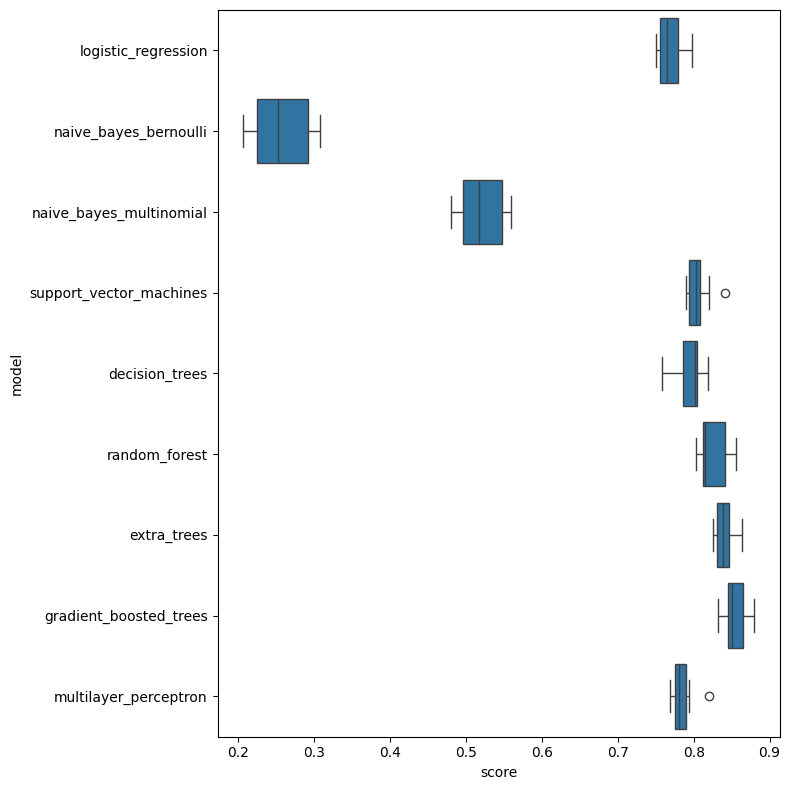

In [71]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.boxplot(x="score", y="model", data=df_anova, ax=ax)
# sns.swarmplot(x="model", y="score", data=df_anova, color='black', alpha = 0.5, ax=ax);

# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
plt.tight_layout()
plt.show()

In [33]:
df_anova

,fold,model,score
0,0,logistic_regression,0.764059
1,1,logistic_regression,0.772021
2,2,logistic_regression,0.769332
3,0,naive_bayes_bernoulli,0.232558
4,1,naive_bayes_bernoulli,0.265570
5,2,naive_bayes_bernoulli,0.274971
6,0,naive_bayes_multinomial,0.528175
7,1,naive_bayes_multinomial,0.526224
8,2,naive_bayes_multinomial,0.505338
9,0,support_vector_machines,0.796380


In [57]:
print('Resultados medios y desviación típica por modelo')
df_anova.groupby('model')['score'].agg(['mean', 'std'])


Resultados medios y desviación típica por modelo


,mean,std
model,,
decision_trees,0.795095,0.017702
extra_trees,0.840151,0.012476
gradient_boosted_trees,0.854115,0.015394
logistic_regression,0.768612,0.015909
multilayer_perceptron,0.784203,0.015057
naive_bayes_bernoulli,0.257270,0.037105
naive_bayes_multinomial,0.518875,0.029406
random_forest,0.824340,0.018695
support_vector_machines,0.805412,0.015895


In [58]:
print('Resultados medios y desviación típica por fold')
df_anova.groupby('fold')['score'].agg(['mean', 'std'])

Resultados medios y desviación típica por fold


,mean,std
fold,,
0,0.709259,0.213018
1,0.710630,0.190622
2,0.704246,0.208164
3,0.719344,0.200621
4,0.714378,0.193841
5,0.727708,0.198943
6,0.736691,0.204425
7,0.697605,0.207391
8,0.728101,0.195132


In [48]:
import pingouin as pg

In [59]:
# Test ANOVA de dos vías (Two-way ANOVA)
# ==============================================================================
pg.anova(
    data     = df_anova,
    dv       = 'score',
    between  = ['model', 'fold'],
    detailed = True
).round(4)

,Source,SS,DF,MS,F,p-unc,np2
0,model,3.1719,8,0.3965,885.5904,0.0,0.9887
1,Within,0.0363,81,0.0004,NaN,NaN,NaN


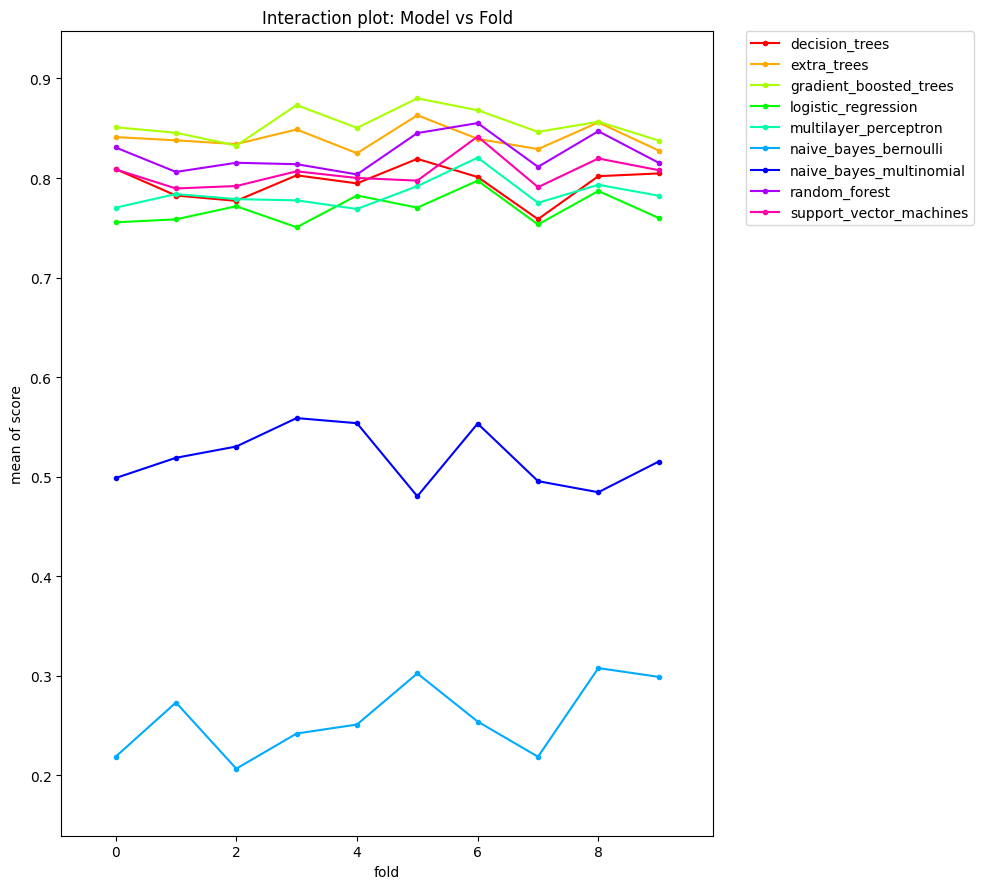

In [78]:
from statsmodels.graphics.factorplots import interaction_plot

fig, ax = plt.subplots(figsize=(10, 9))
fig = interaction_plot(
    x        = df_anova.fold,
    trace    = df_anova.model,
    response = df_anova.score,
    ax       = ax,
)

ax.set_title("Interaction plot: Model vs Fold")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()
